### IRIS Dataset Description.

This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray
The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.
The below plot uses the first two features. 

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 

**Predicted attribute**: class of iris plant. 

**Attribute Information:**

1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 
5. class: 
-- Iris Setosa 
-- Iris Versicolour 
-- Iris Virginica

### Problem Description.

To classify a given species attributes to one of the three classes as Setosa, Virginica or Versicolour. This is a Multivariate data.

### Importing all the files

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline

In [9]:
import sqlite3
import pickle

from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
import re
import nltk
from nltk.corpus import stopwords

#import gensim

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import cross_validation

C:\Users\Karunesh\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Reading the iris data file

In [11]:
iris = pd.read_csv("iris.csv")

In [12]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Shuffling the data as the three species are stored symmetrically 

In [13]:
from sklearn.utils import shuffle

In [14]:
iris=shuffle(iris,random_state=123)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
72,6.3,2.5,4.9,1.5,versicolor
112,6.8,3.0,5.5,2.1,virginica
132,6.4,2.8,5.6,2.2,virginica
88,5.6,3.0,4.1,1.3,versicolor
37,4.9,3.1,1.5,0.1,setosa


In [15]:
iris.shape
type(iris)

pandas.core.frame.DataFrame

### Seperating the Labels as y and Features as y

In [16]:
x=iris.iloc[:,0:4].values
y=iris.iloc[:,4].values

In [17]:
y.shape

(150,)

In [18]:
x.shape

(150, 4)

### Performing Column Standarization

In [19]:
s=StandardScaler()
x=s.fit_transform(x)

### Spliting training and testing data into 70% train and 30% test data.

In [20]:
x_train=x[:105,:]
x_test=x[105:,:]
y_train=y[:105]
y_test=y[105:]

#### Takes 2-3 minutes

### KNN Model on the dataset.

In [21]:
# creating odd list of K for KNN
neighbors = list(range(1,20,2))
# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)


The optimal number of neighbors is 5.


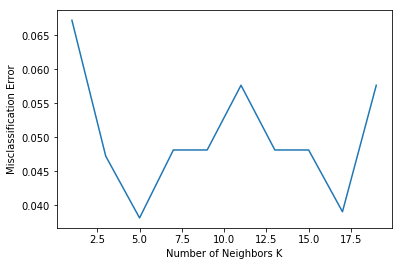

In [22]:
# plot misclassification error vs k 
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

**Building the Classifier on the optimal K i.e 5**

In [23]:
classifier=KNeighborsClassifier(n_neighbors=optimal_k)
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [24]:
y_pred=classifier.predict(x_test)

In [25]:
acc=accuracy_score(y_test,y_pred,normalize=True)*float(100)
acc

95.55555555555556

### Confusion matrix 

In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
confusion_matrix(y_test,y_pred).T

array([[10,  0,  0],
       [ 0, 18,  1],
       [ 0,  1, 15]], dtype=int64)

### Here from the confusion matrix we can observe that 10 species of setosa where predicted correctly , 18 out of 19 versicolor species where predicted correctly and 15 out of 16 virginica species where predicted correctly.